In [2]:
from typing import TypedDict
class PortfolioState(TypedDict): 
    amount_usd : float
    total_usd : float 
    total_inr : float

In [3]:
def calc_total_usd(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08  
    return state

In [4]:
def calc_total_inr (state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] * 85.0  
    return state

In [5]:
from langgraph.graph import StateGraph , START , END

builder = StateGraph(PortfolioState)
builder.add_node("calc_total_usd", calc_total_usd)
builder.add_node("conv_to_inr", calc_total_inr)

builder.add_edge(START, "calc_total_usd" )
builder.add_edge("calc_total_usd", "conv_to_inr")
builder.add_edge("conv_to_inr", END)

graph = builder.compile()

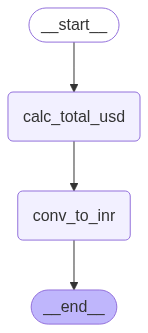

In [6]:
from IPython.display import Image , display

display(Image(graph.get_graph().draw_mermaid_png()))

In [7]:
graph.invoke({"amount_usd": 1000.0})

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'total_inr': 91800.0}